<a href="https://colab.research.google.com/github/israelrosa/tesseract-ocr/blob/main/tesseract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Aula 1

## Introdução ao OCR



```
# Isto está formatado como código
```

### Como o OCR funciona?
* Aquisição da imagem
* Pré-processamento
* Reconhecimento de texto
  - Reconhecimento de padrões
  - Detecção de recursos
* Pós-processamento



Existem diversas ferramentas disponíveis para serem utilizadas e nós vamos utilizar o [`pytesseract`](https://pypi.org/project/pytesseract/), que é uma biblioteca do Python que permite com que possamos utilizar o [`Tesseract OCR`](https://tesseract-ocr.github.io/), que é um recurso open source da Google e funciona com a OCR Engine. Por ser um recurso open source tem um [`repositório no GitHub`](https://github.com/tesseract-ocr/tesseract), e mais de 100 línguas no seu vocabulário, além de ser possível fazer com que ele aprenda novas linguagens.

##Instalação dos pacotes

In [ ]:
!pip install opencv-python==4.6.0
!sudo apt install tesseract-ocr
!pip install pytesseract==0.3.9

ERROR: Could not find a version that satisfies the requirement opencv-python==4.6.0 (from versions: 3.4.0.14, 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.15.55, 3.4.16.57, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72, 4.8.0.74)
ERROR: No matching distribution found for opencv-python==4.6.0
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git

##Importações

In [ ]:
import pytesseract
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
pytesseract.__version__

'0.3.9'

In [ ]:
cv2.__version__

'4.7.0'

##Clonar Repositório

In [ ]:
! git clone https://github.com/sthemonica/text-recognize

Cloning into 'text-recognize'...
remote: Enumerating objects: 148, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 148 (delta 34), reused 140 (delta 30), pack-reused 0
Receiving objects: 100% (148/148), 37.21 MiB | 46.46 MiB/s, done.
Resolving deltas: 100% (34/34), done.


# Tratamento de imagem

##Importar Imagem

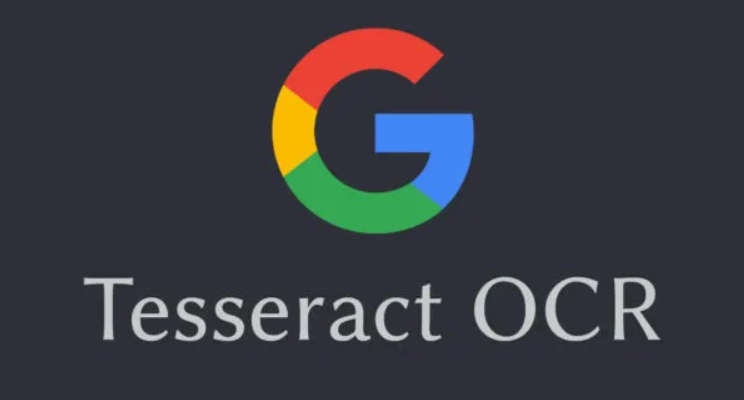

In [ ]:
img = cv2.imread("/content/text-recognize/Imagens/Aula1-ocr.png")
cv2_imshow(img)

In [ ]:
text = pytesseract.image_to_string(img)
print(text)

c

Tesseract OCR



## OCR no Colab

## Imagem BGR

O OpenCV tem seus canais de cores invertidos, então para utilizarmos com outras bibliotecas precisamos fazer a conversão de BGR para RGB.
Existem outros tipos de conversões que podem ser feitas e a lista pode ser acessada no site da [documentação do OpenCV](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html).

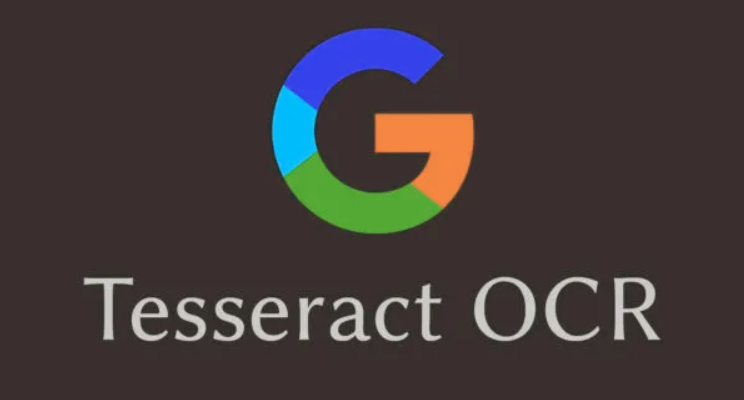

In [ ]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

# Aula 2

## Caracteres diferentes

## Importar imagem

In [ ]:
!apt-get install tesseract-ocr-por

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-por is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


As palavras **frequência** e **observações** não conseguiram ser traduzidas de uma forma boa o suficiente, o que nos faz pensar que o Tesseract está com algum problema e vamos verificar quais as listas de línguas que estão instaladas atualmente no sistema para auxiliar na leitura das nossas imagens, para isso usamos:

```
!tesseract --list-langs
```

In [ ]:
!tesseract --list-langs

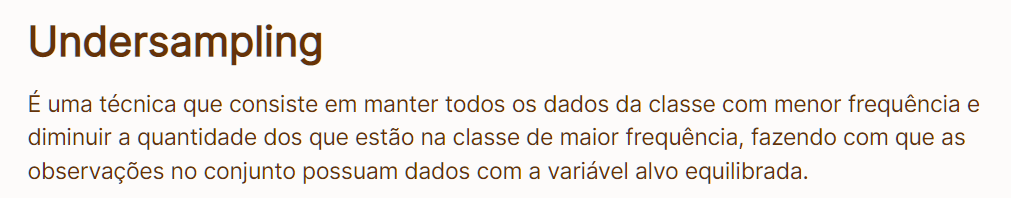

In [ ]:
imgUS = cv2.imread("/content/text-recognize/Imagens/Aula2-undersampling.png")
imgUSRGB = cv2.cvtColor(imgUS, cv2.COLOR_BGR2RGB)
cv2_imshow(imgUSRGB)

In [ ]:
pytesseract.image_to_string(imgUSRGB, lang='por')

'Undersampling\n\nÉ uma técnica que consiste em manter todos os dados da classe com menor frequência e\ndiminuir a quantidade dos que estão na classe de maior frequência, fazendo com que as\nobservações no conjunto possuam dados com a variável alvo equilibrada.\n\x0c'

##Desafio da pasta de linguagens


In [ ]:
!mkdir tessdata

In [ ]:
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true


--2023-08-05 16:57:45--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata [following]
--2023-08-05 16:57:45--  https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata [following]
--2023-08-05 16:57:45--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awa

In [ ]:
config_tesseract = "--tessdata-dir tessdata"
text = pytesseract.image_to_string(imgUSRGB , lang='por' , config=config_tesseract)
print(text)

Undersampling

É uma técnica que consiste em manter todos os dados da classe com menor frequência e
diminuir a quantidade dos que estão na classe de maior frequência, fazendo com que as
observações no conjunto possuam dados com a variável alvo equilibrada.



## PSM

Page Segmentation Mode (PSM) ou em uma

---

tradução livre modos de segmentação de página.

In [ ]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


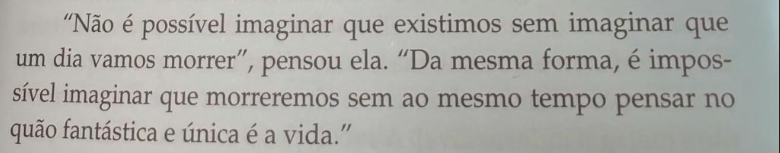

In [ ]:
imgTL = cv2.imread("/content/text-recognize/Imagens/Aula2-trecho-livro.png")
imgTLRGB = cv2.cvtColor(imgTL, cv2.COLOR_BGR2RGB)
cv2_imshow(imgTLRGB)

In [ ]:
config_tesseract = "--tessdata-dir tessdata --psm 6"
text = pytesseract.image_to_string(imgTLRGB , lang='por' , config=config_tesseract)
print(text)

“Não é possível imaginar que existimos sem imaginar que
um dia vamos morrer”, pensou ela. “Da mesma forma, é impos-
sível imaginar que morreremos sem ao mesmo tempo pensar no
quão fantástica e única é a vida.”



## Aplicando o PSM


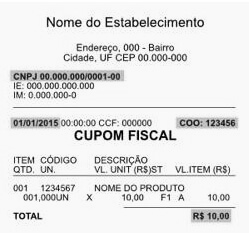

In [ ]:
img = cv2.imread('/content/text-recognize/Atividades/Aula2-Nota_Fiscal.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [ ]:
config_tesseract = "--tessdata-dir tessdata --psm 4"
text = pytesseract.image_to_string(gray , lang='por' , config=config_tesseract)
print(text)

Nome do Estabelecimento

Endereço, 090 - Bairro,
(cidade, UF CEP 00.000-000

exs
TE -000.000 000 000

ItmIMOIS 00 00.00 ccF. con0co — IGoGENaSASS
CUPOM FISCAL

mEM cóDIGO — DESCRIÇÃO
mo om VEONTIRSIST VLTEM(RS)

1001 1234667 — NOMEDO PRODUTO
OONOGOUN X 1000 ETA 1000

Tora R$ 1000



## Biblioteca Pillow

Biblioteca Pillow, que é mais conhecida pelo seu nome antigo, **PIL**: Python Imaging Library.

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt


**Método utilizado:**

```
pytesseract.image_to_osd()
```


OSD significa Orientation and Script Detection e o seu retorno são os "metadados" da imagem.

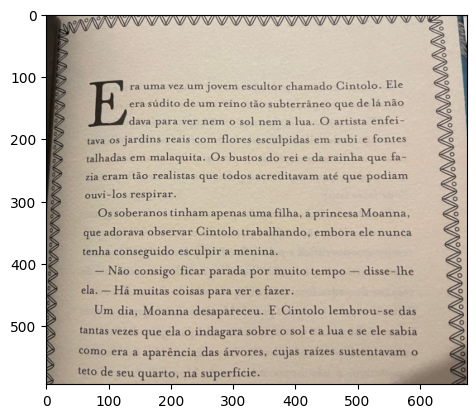

In [ ]:
img = Image.open('/content/text-recognize/Imagens/Aula2-livro.png')
plt.imshow(img);

In [ ]:
print(pytesseract.image_to_osd(img))

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 0.93
Script: Latin
Script confidence: 2.46



# Aula 3

## Selecionando textos

In [ ]:
from pytesseract import Output

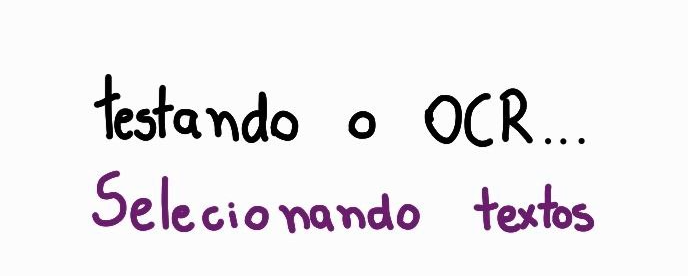

In [ ]:
img = cv2.imread('/content/text-recognize/Imagens/Aula3-testando.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [ ]:
config_tesseract = '--tessdata-dir tessdata'
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang='por', output_type=Output.DICT)
resultado

{'level': [1, 2, 3, 4, 5, 5, 5, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1, 1, 2, 2, 2],
 'word_num': [0, 0, 0, 0, 1, 2, 3, 0, 1, 2],
 'left': [0, 92, 92, 94, 94, 348, 425, 92, 92, 474],
 'top': [0, 74, 74, 74, 74, 111, 88, 171, 171, 184],
 'width': [688, 502, 502, 491, 204, 28, 160, 502, 328, 120],
 'height': [276, 159, 159, 73, 69, 28, 59, 62, 62, 49],
 'conf': ['-1', '-1', '-1', '-1', 63, 90, 48, '-1', 85, 77],
 'text': ['',
  '',
  '',
  '',
  'Testando',
  'o',
  'OCR..',
  '',
  'Selecionando',
  'textos']}

- **block_num** = Número do bloco atual. Quando o tesseract faz o OCR, ele divide a imagem em várias regiões, o que pode variar de acordo com os parametros do PSM e também outros critérios próprios do algoritmo. Cada bloco é uma região

- **conf** = confiança da predição (de 0 a 100. -1 significa que não foi reconhecido texto)

- **height** = altura do bloco de texto detectada (ou seja, da caixa delimitadora)

- **left** = coordenada x onde inicia a caixa delimitadora

- **level** = o level (nível) corresponde à categoria do bloco detectado. são 5 valores possiveis:
  1. página
  2. bloco
  3. parágrafo
  4. linha
  5. palavra

Portanto, se foi retornado o valor 5 significa que o bloco detectado é texto, se foi 4 significa que o que foi detectado é uma linha

- **line_num** = número da linha do que foi detectado (inicia com 0)

- **page_num** = o índice da página onde o item foi detectado. Na maioria dos casos sempre haverá uma página só

- **text** = o resultado do reconhecimento

- **top** = coordenada y onde a caixa delimitadora começa

- **width** = largura do bloco de texto atual detectado

- **word_num** = numero da palavra (indice) dentro do bloco atual

In [ ]:
min_conf = 12 #@param {type: 'slider', min: 0, max: 100}

## Caixa Delimitadora

In [ ]:
def caixa_texto(resultado, img, cor = (255, 100, 0)):
  x = resultado['left'][i]
  y = resultado['top'][i]
  w = resultado['width'][i]
  h = resultado['height'][i]

  cv2.rectangle(img, (x, y), (x+w, y+h), cor, 2)

  return x, y, img


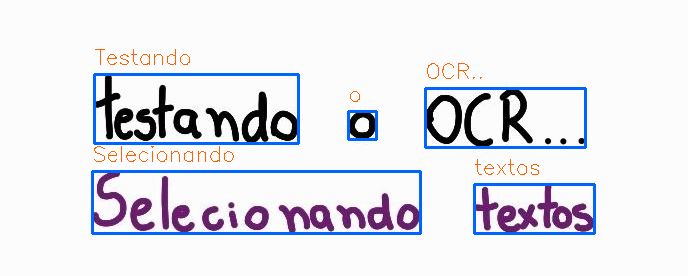

In [ ]:
img_copia = rgb.copy()
for i in range(len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)

    texto = resultado['text'][i]
    cv2.putText(img_copia, texto, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,100,255))

cv2_imshow(img_copia)

## Desafio aula 3

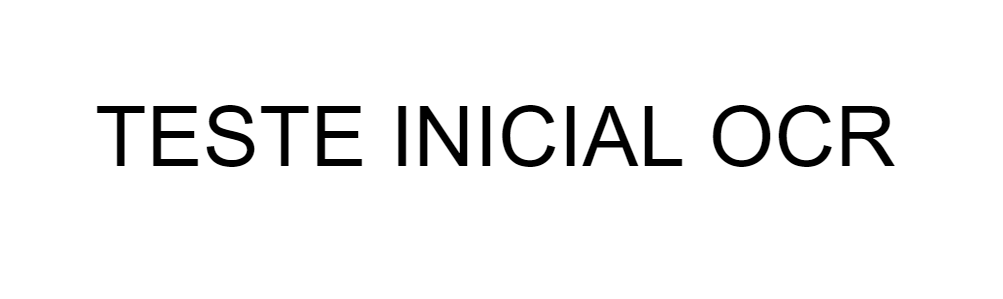

In [ ]:
img = cv2.imread('/content/text-recognize/Imagens/Aula1-teste.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [ ]:
config_tesseract = '--tessdata-dir tessdata'
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang='por', output_type=Output.DICT)
resultado

{'level': [1, 2, 3, 4, 5, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1, 1],
 'word_num': [0, 0, 0, 0, 1, 2, 3],
 'left': [0, 97, 97, 97, 97, 398, 713],
 'top': [0, 105, 105, 105, 105, 105, 105],
 'width': [1003, 797, 797, 797, 265, 284, 181],
 'height': [299, 62, 62, 62, 62, 62, 62],
 'conf': ['-1', '-1', '-1', '-1', 91, 88, 89],
 'text': ['', '', '', '', 'TESTE', 'INICIAL', 'OCR']}

In [ ]:
min_conf = 3 #@param {type: 'slider', min: 0, max: 100}

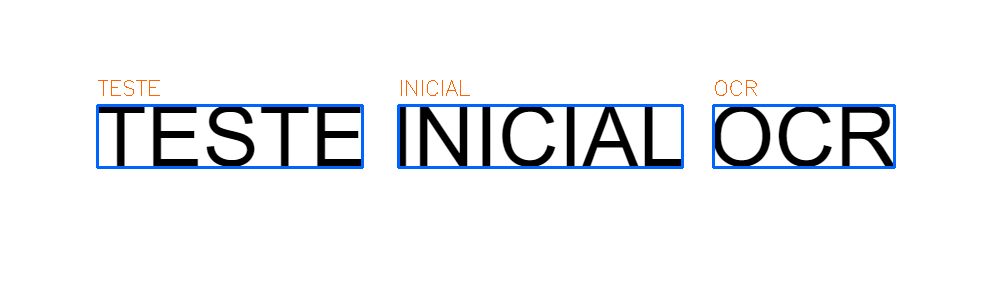

In [ ]:
img_copia = rgb.copy()
for i in range(len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)

    texto = resultado['text'][i]
    cv2.putText(img_copia, texto, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,100,255))

cv2_imshow(img_copia)

## Fontes

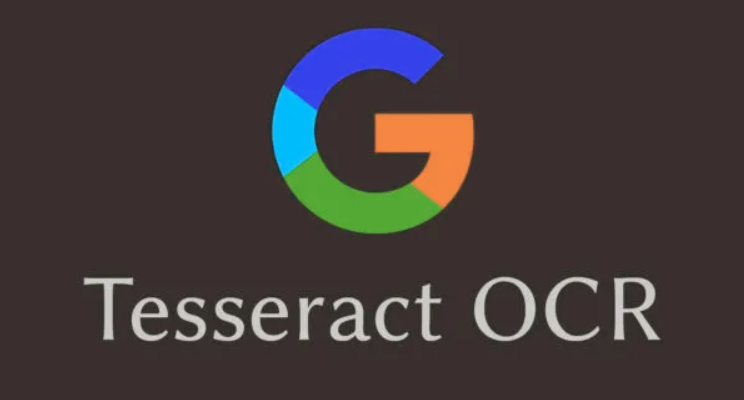

In [ ]:
img = cv2.imread('/content/text-recognize/Imagens/Aula1-ocr.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [ ]:
config_tesseract = '--tessdata-dir tessdata'
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang='por', output_type=Output.DICT)
resultado


{'level': [1, 2, 3, 4, 5, 2, 3, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2, 2],
 'par_num': [0, 0, 1, 1, 1, 0, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 0, 0, 1, 1, 1],
 'word_num': [0, 0, 0, 0, 1, 0, 0, 0, 1, 2],
 'left': [0, 272, 272, 272, 272, 84, 84, 84, 84, 474],
 'top': [0, 28, 28, 28, 28, 277, 277, 277, 278, 277],
 'width': [744, 202, 202, 202, 202, 576, 576, 576, 357, 186],
 'height': [400, 205, 205, 205, 205, 64, 64, 64, 63, 64],
 'conf': ['-1', '-1', '-1', '-1', 91, '-1', '-1', '-1', 91, 90],
 'text': ['', '', '', '', 'G', '', '', '', 'Tesseract', 'OCR']}

In [ ]:
from PIL import ImageFont, ImageDraw, Image

fonte = '/content/text-recognize/Imagens/calibri.ttf'

In [ ]:
def escreve_texto(texto, x, y, img, fonte, tamanho_texto=32):
  fonte = ImageFont.truetype(fonte, tamanho_texto)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y - tamanho_texto), texto, font = fonte)
  img = np.array(img_pil)
  return img


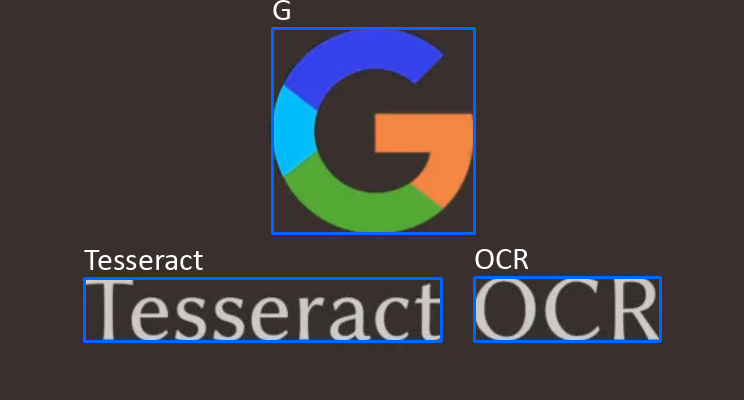

In [ ]:
img_copia = rgb.copy()
for i in range(len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)

    texto = resultado['text'][i]
    #cv2.putText(img_copia, texto, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,100,255))
    img_copia = escreve_texto(texto, x, y, img_copia, fonte)

cv2_imshow(img_copia)



#Aula 4

## Utilizando Regex

In [ ]:
import re

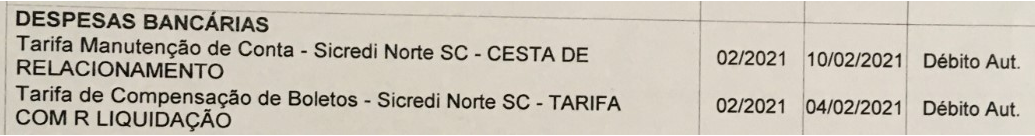

In [ ]:
img = cv2.imread('/content/text-recognize/Imagens/Aula4-tabela_teste.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)


In [ ]:
config_tesseract = "--tessdata-dir tessdata"
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang="por", output_type=Output.DICT)
resultado


{'level': [1,
  2,
  3,
  4,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5],
 'page_num': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'block_num': [0,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3],
 'par_num': [0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  

In [ ]:
padrao_data = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'


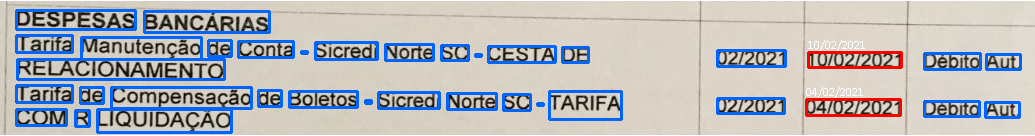

In [ ]:
datas = []
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    texto = resultado['text'][i]

    if re.match(padrao_data, texto):
      x, y, img = caixa_texto(resultado, img_copia, (0,0,255))
      img_copia = escreve_texto(texto, x, y, img_copia, fonte, 12)
      datas.append(texto)
    else:
      x, y, img_copia = caixa_texto(resultado, img_copia)


cv2_imshow(img_copia)


In [ ]:
datas

['10/02/2021', '04/02/2021']

## Desafio Regex

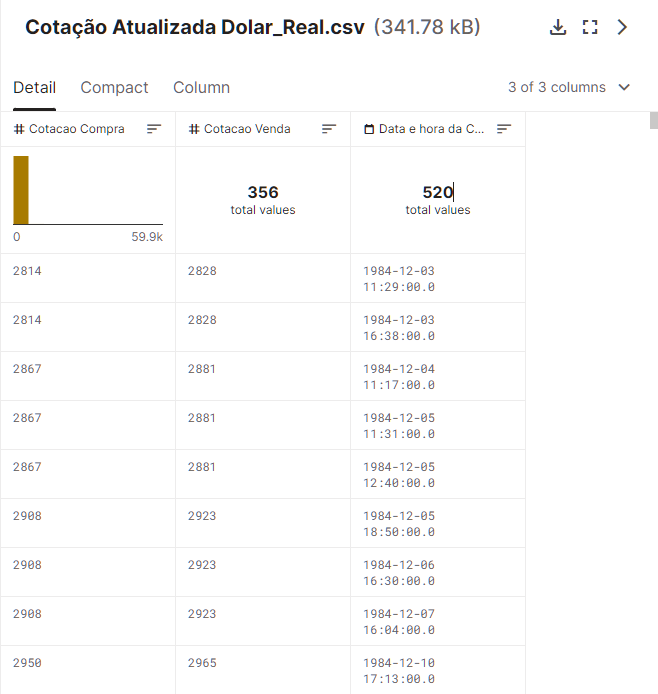

In [ ]:
img = cv2.imread('/content/text-recognize/Atividades/Aula4_cotacao.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [ ]:
config_tesseract = "--tessdata-dir tessdata"
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang="por", output_type=Output.DICT)
resultado

{'level': [1,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  2,
  3,
  4,
  5,
  2,
  3,
  4,
  5,
  5,
  2,
  3,
  4,
  5,
  4,
  5,
  2,
  3,
  4,
  5,
  4,
  5,
  2,
  3,
  4,
  5,
  4,
  5,
  2,
  3,
  4,
  5,
  4,
  5,
  2,
  3,
  4,
  5,
  4,
  5,
  2,
  3,
  4,
  5,
  4,
  5,
  2,
  3,
  4,
  5,
  4,
  5,
  2,
  3,
  4,
  5,
  4,
  5,
  2,
  3,
  4,
  5,
  4,
 

In [ ]:
padrao_hora = '([01]?[0-9]|2[0-3]):[0-5][0-9](:[0-5][0-9])?'

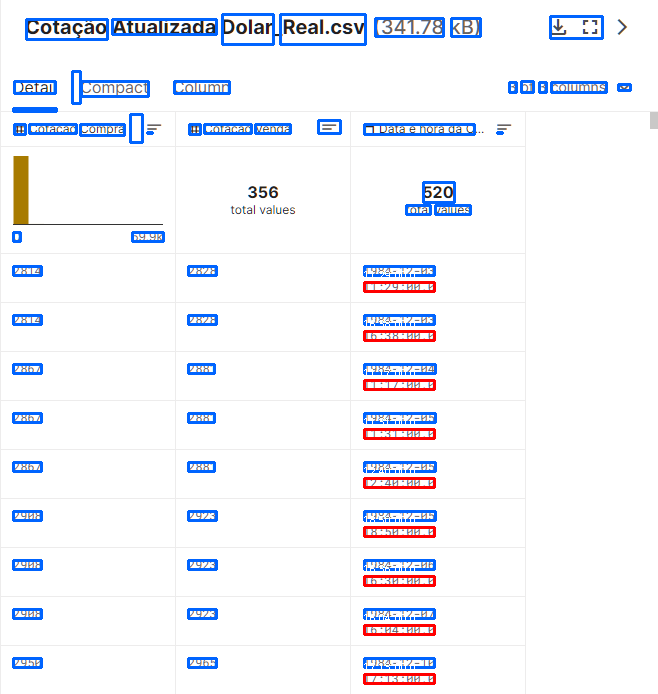

In [ ]:
horas = []
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    texto = resultado['text'][i]

    if re.match(padrao_hora, texto):
      x, y, img = caixa_texto(resultado, img_copia, (0,0,255))
      img_copia = escreve_texto(texto, x, y, img_copia, fonte, 12)
      horas.append(texto)
    else:
      x, y, img_copia = caixa_texto(resultado, img_copia)


cv2_imshow(img_copia)